In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [76]:
df = pd.read_csv('training_data.csv')

# Descriptive statistics

In [77]:
desc_stats = df.describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
             zipcode  AveragePrice   ArrestCount  NoiseComplaints  \
count  21700.000000  2.170000e+04  21700.000000     21700.000000   
mean   10835.998940  6.686554e+05    157.206083       178.833180   
std      564.848815  4.755625e+05    148.179991       179.845991   
min    10001.000000  9.490100e+04      1.000000         1.000000   
25%    10305.000000  3.871952e+05     49.000000        58.000000   
50%    11205.000000  5.255740e+05    115.000000       125.000000   
75%    11362.000000  7.550510e+05    215.000000       235.000000   
max    11694.000000  4.549710e+06   1039.000000      2361.000000   

       distance_to_facility  cultural_facility  education_facility  \
count          21700.000000       21700.000000        21700.000000   
mean               1.166728           2.833917           21.236682   
std                0.421247           3.469322           16.215148   
min                0.459536           0.000000            1.000000   
25%         

In [78]:
# Mean sales and average household income
mean_values = df.groupby('zipcode').agg({'AveragePrice': 'mean', 'average_household_income': 'mean'})
mean_values.rename(columns={'AveragePrice': 'MeanSales', 'average_household_income': 'MeanHouseholdIncome'}, inplace=True)
print("Mean Sales and Average Household Income:\n", mean_values)

Mean Sales and Average Household Income:
             MeanSales  MeanHouseholdIncome
zipcode                                   
10001    2.233518e+06        164953.202440
10002    7.986704e+05         54121.211686
10003    1.390611e+06        248253.131343
10004    1.372237e+06        349748.050167
10005    1.334492e+06        620393.071221
...               ...                  ...
11435    4.805680e+05         41380.049296
11436    3.455778e+05         40131.369011
11691    3.993957e+05         40765.211958
11692    3.189137e+05         39599.859520
11694    6.174217e+05         90982.962249

[166 rows x 2 columns]


Silhouette Score: 0.16021831840089518


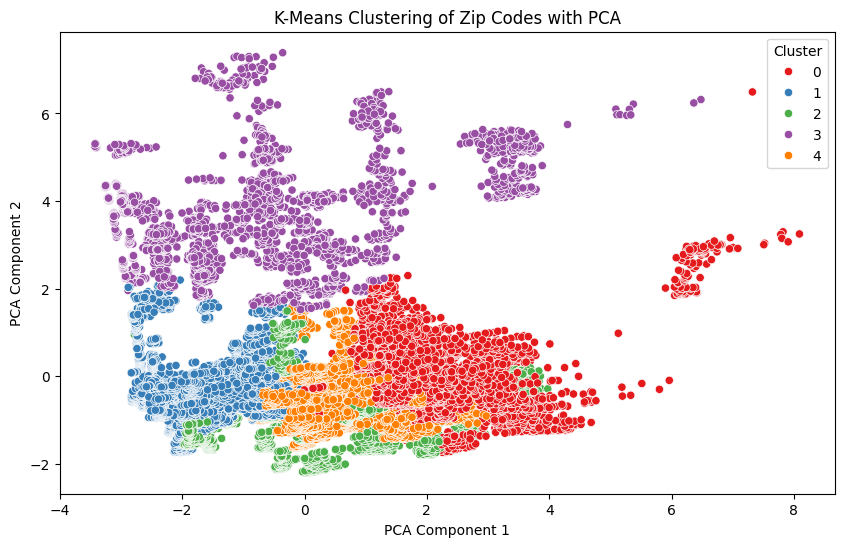

In [79]:
# Handle categorical data
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Select features for clustering
features = ['AveragePrice', 'ArrestCount', 'NoiseComplaints', 'distance_to_facility',
            'cultural_facility', 'education_facility', 'health_services', 'public_safety',
            'recreational_facility', 'religious_institution', 'transportation_facility',
            'population', 'average_household_income']

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Perform k-means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visualize clusters
# You can use PCA to reduce dimensions for visualization if needed
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
plt.title('K-Means Clustering of Zip Codes with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

k: 2, Silhouette Score: 0.20840268341493726
k: 3, Silhouette Score: 0.15851135994079676
k: 4, Silhouette Score: 0.21115690506212023
k: 5, Silhouette Score: 0.16021831840089518
k: 6, Silhouette Score: 0.16895407631845047
k: 7, Silhouette Score: 0.18906850631241606
k: 8, Silhouette Score: 0.1985478463551372
k: 9, Silhouette Score: 0.20941574632520965
k: 10, Silhouette Score: 0.21494282251295307


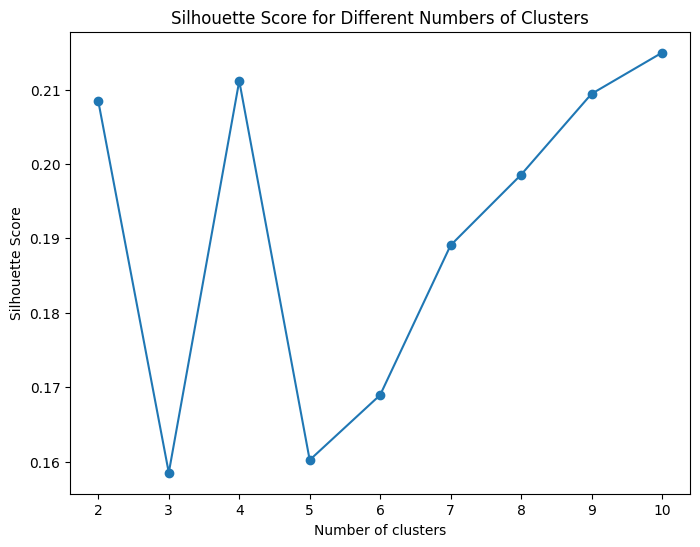

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to find the optimal number of clusters
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    s = []
    
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        s.append(silhouette_score(data, kmeans.labels_))
        print(f'k: {k}, Silhouette Score: {silhouette_score(data, kmeans.labels_)}')
    
    return iters, s

# Run the function and plot the silhouette scores
iters, s = find_optimal_clusters(df_scaled, 10)
plt.figure(figsize=(8, 6))
plt.plot(iters, s, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# 1. Time Series Visualization

C:\Users\simon\AppData\Local\Temp\ipykernel_28804\2584833663.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


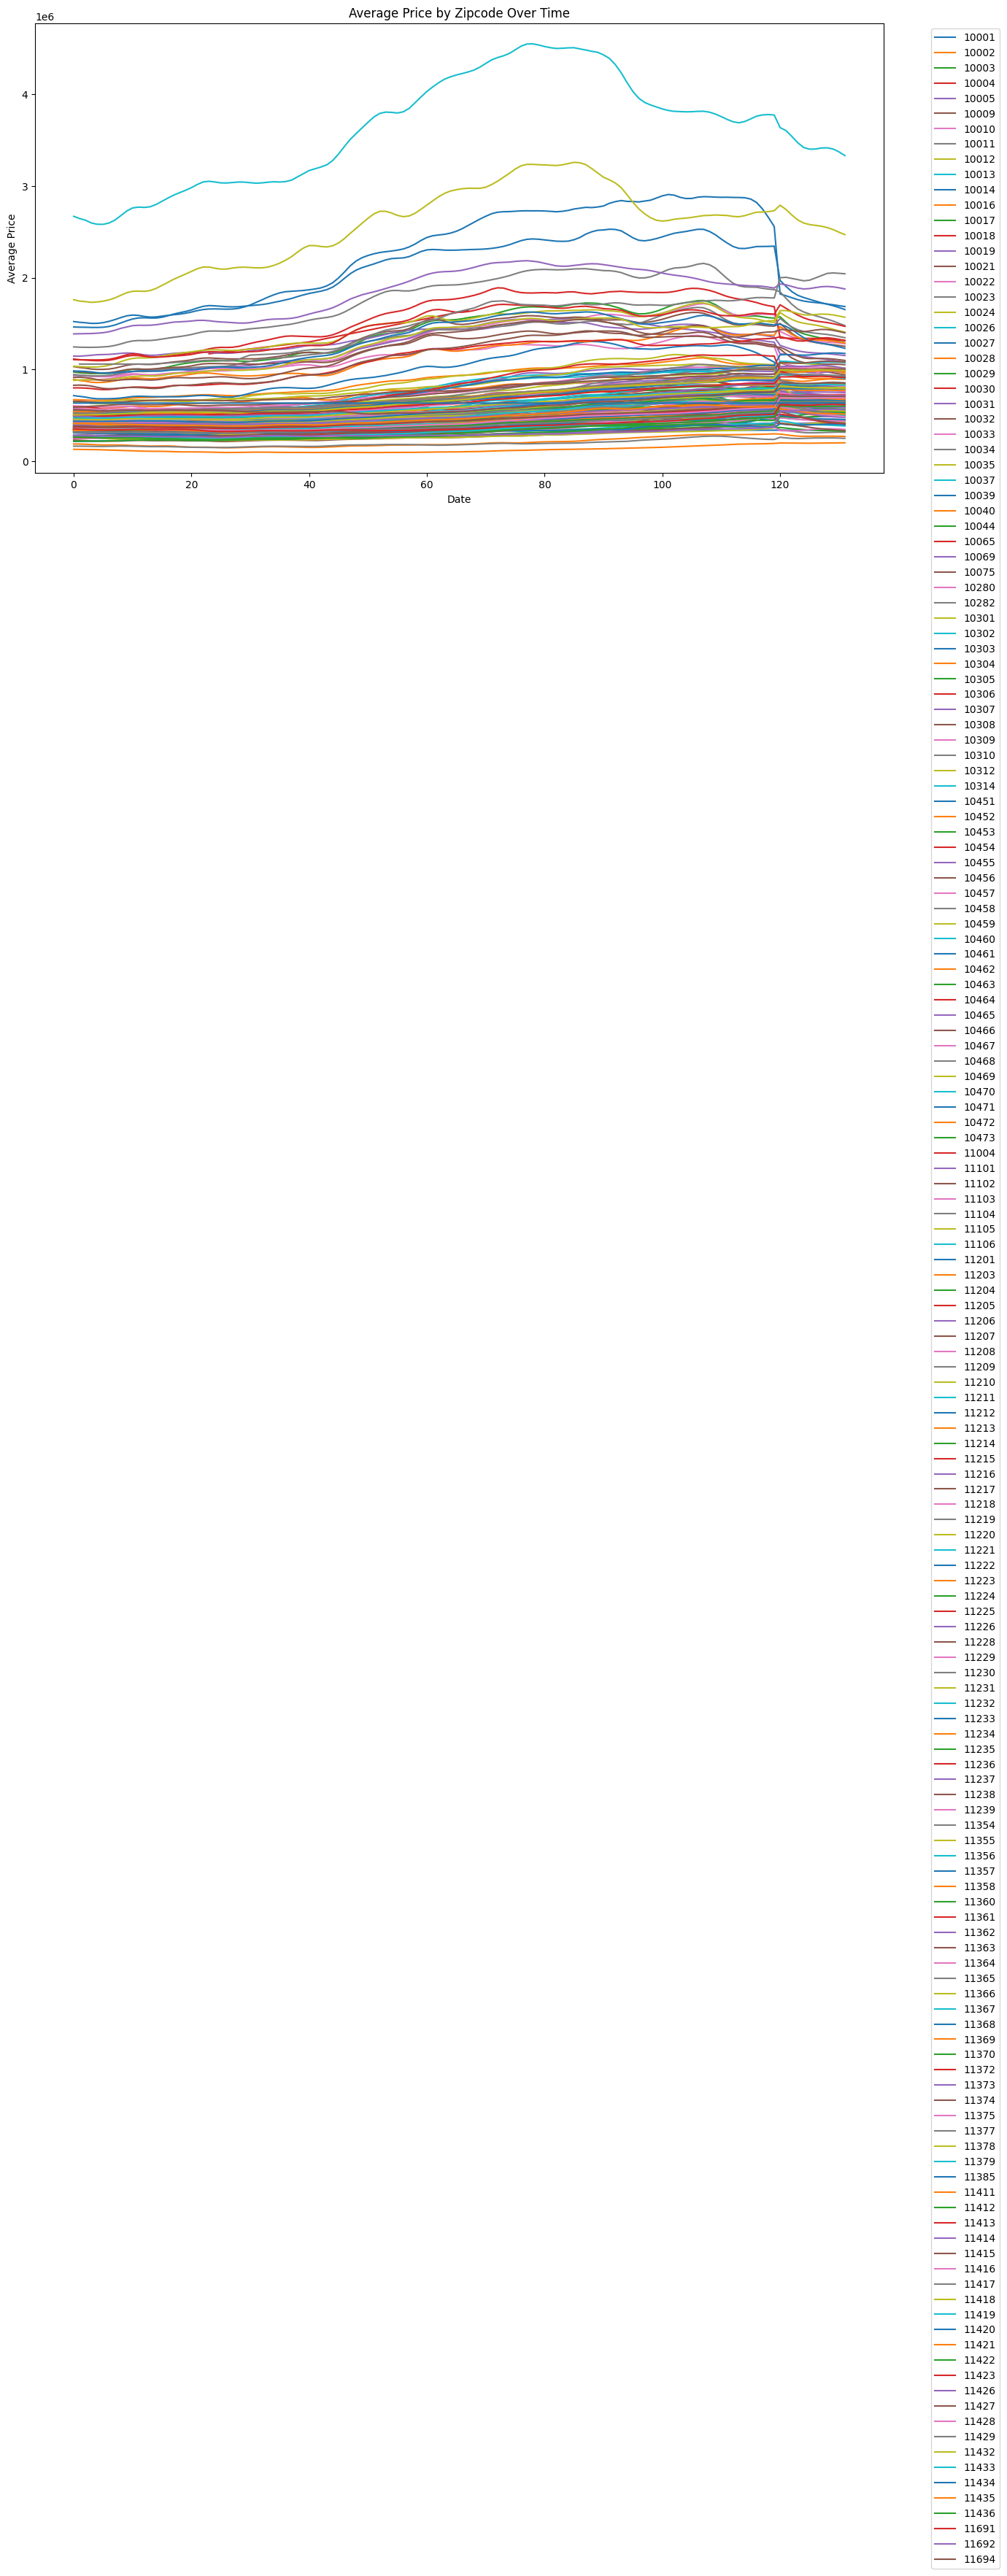

In [81]:
plt.figure(figsize=(15,8))
for zipcode in df['zipcode'].unique():
    zipcode_data = df[df['zipcode'] == zipcode]
    plt.plot(zipcode_data['YearMonth'], zipcode_data['AveragePrice'], label=zipcode)
plt.title('Average Price by Zipcode Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Distribution Analysis

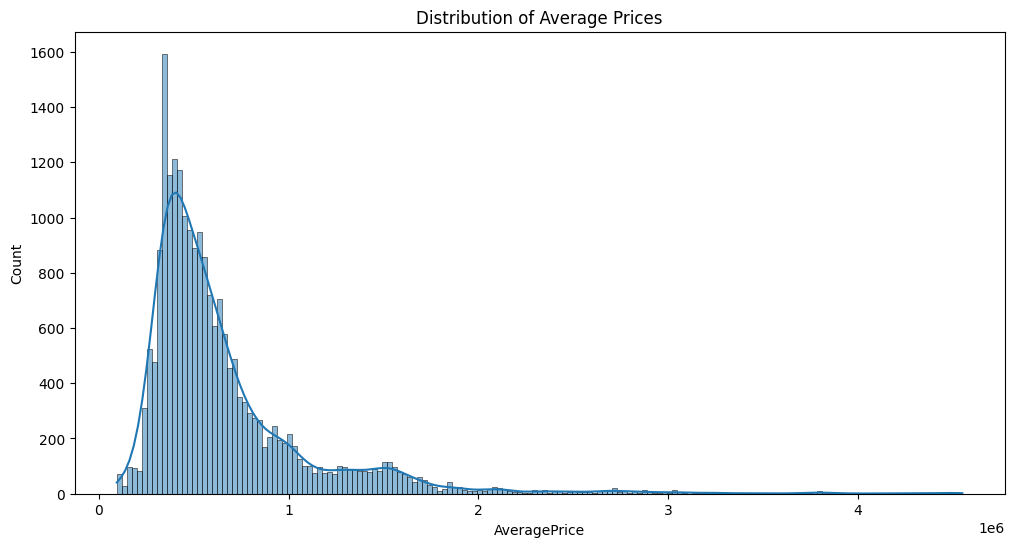

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(df['AveragePrice'], kde=True)
plt.title('Distribution of Average Prices')
plt.show()

# 3. Correlation Analysis

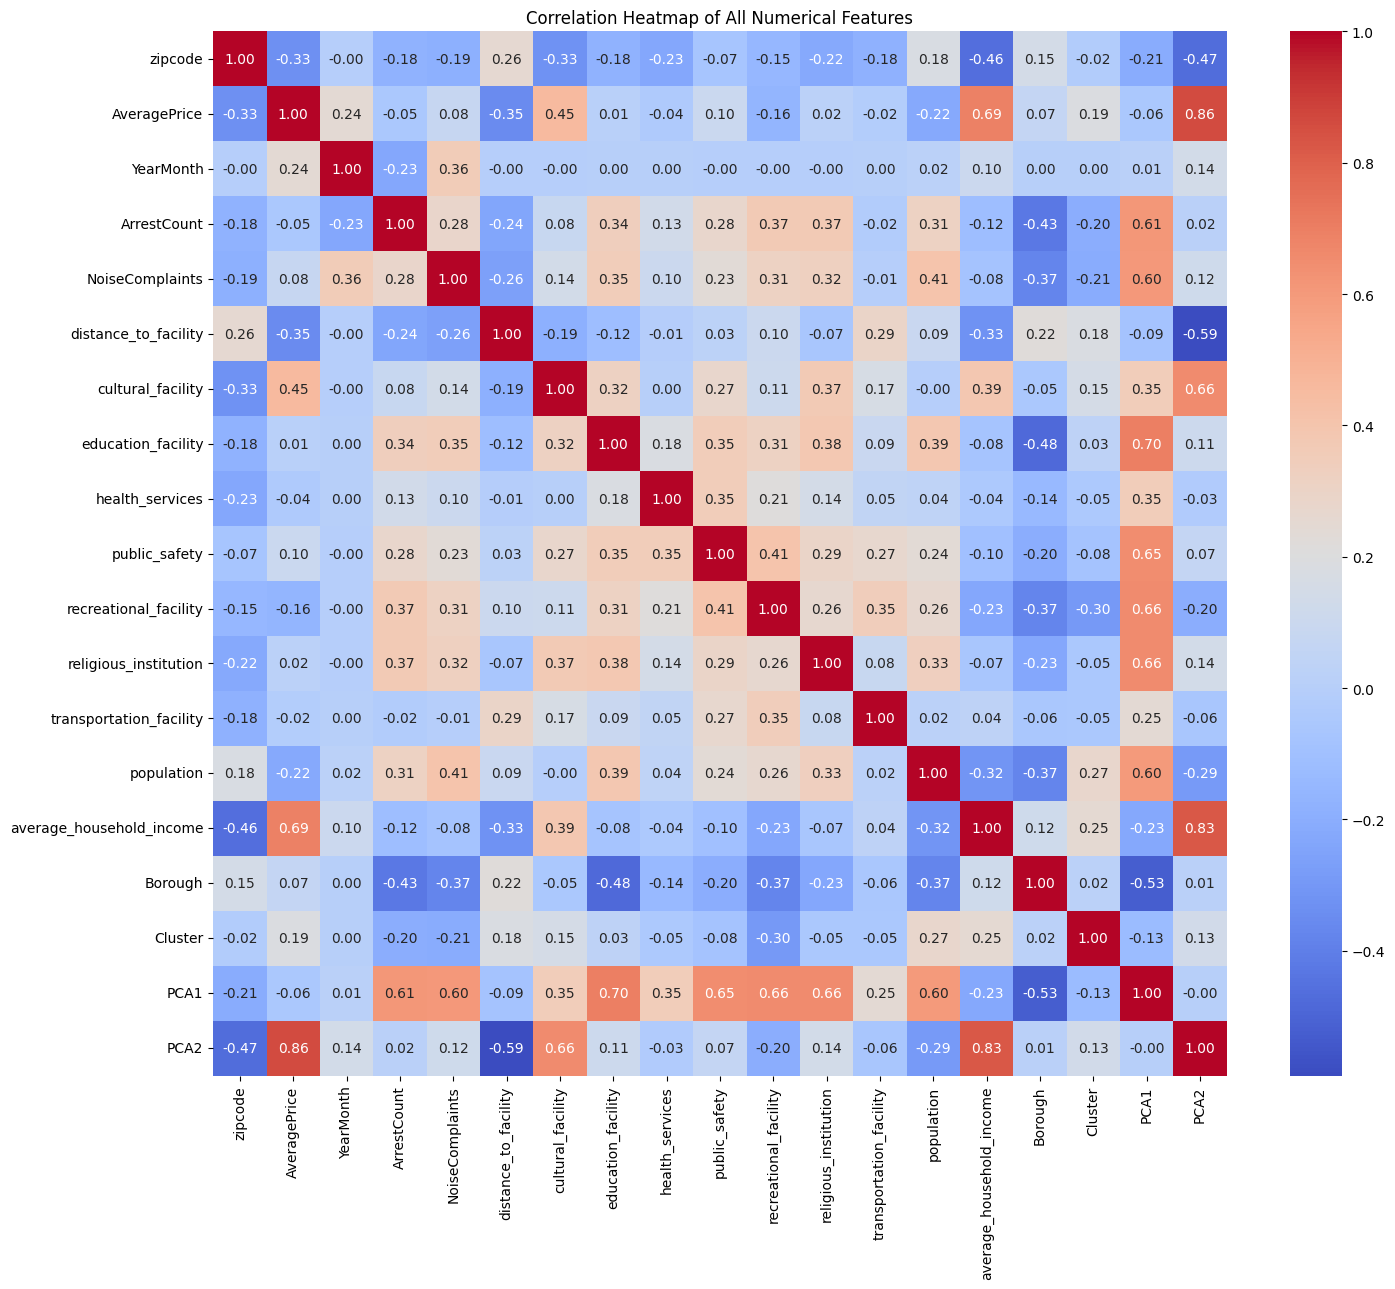

In [83]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(15,13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Numerical Features')
plt.tight_layout()
plt.show()

# 4. Seasonality and Trend Analysis

<Figure size 1500x1200 with 0 Axes>

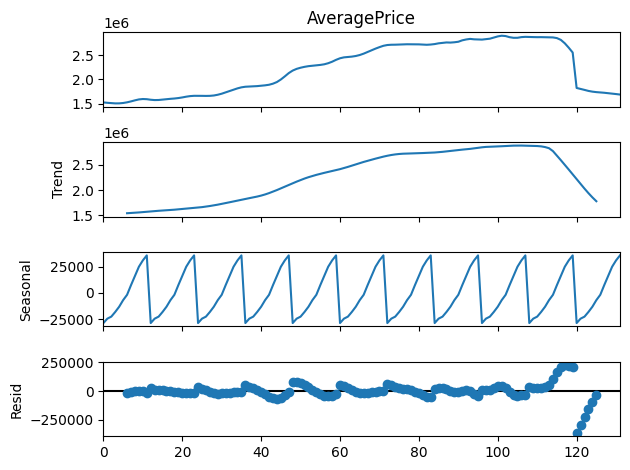

In [84]:
sample_zipcode = df['zipcode'].mode().iloc[0]
sample_data = df[df['zipcode'] == sample_zipcode].set_index('YearMonth')['AveragePrice']

decomposition = seasonal_decompose(sample_data, model='additive', period=12)
plt.figure(figsize=(15,12))
decomposition.plot()
plt.tight_layout()
plt.show()


# 5. Borough and Zipcode Comparisons

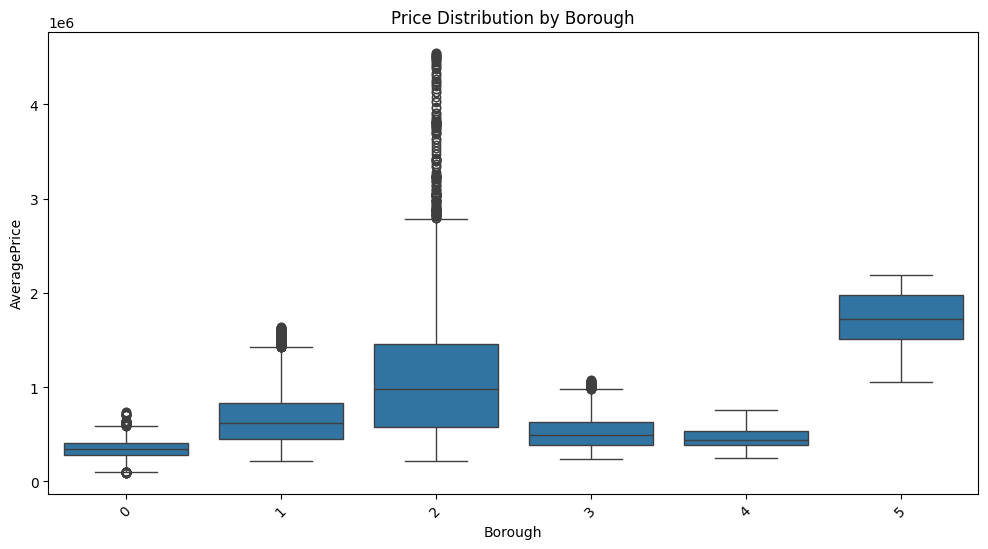

In [85]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Borough', y='AveragePrice', data=df)
plt.title('Price Distribution by Borough')
plt.xticks(rotation=45)
plt.show()

# Top 5 and bottom 5 zipcodes by average price

In [86]:
top_5 = df.groupby('zipcode')['AveragePrice'].mean().nlargest(5)
bottom_5 = df.groupby('zipcode')['AveragePrice'].mean().nsmallest(5)

print("Top 5 zipcodes by average price:")
print(top_5)
print("\nBottom 5 zipcodes by average price:")
print(bottom_5)


Top 5 zipcodes by average price:
zipcode
10013    3.612569e+06
10012    2.552798e+06
10001    2.233518e+06
10014    2.059514e+06
10069    1.857100e+06
Name: AveragePrice, dtype: float64

Bottom 5 zipcodes by average price:
zipcode
10462    128739.424242
10468    196480.318182
10452    208418.492424
10459    284031.810606
10456    289406.121212
Name: AveragePrice, dtype: float64


# Price growth rate

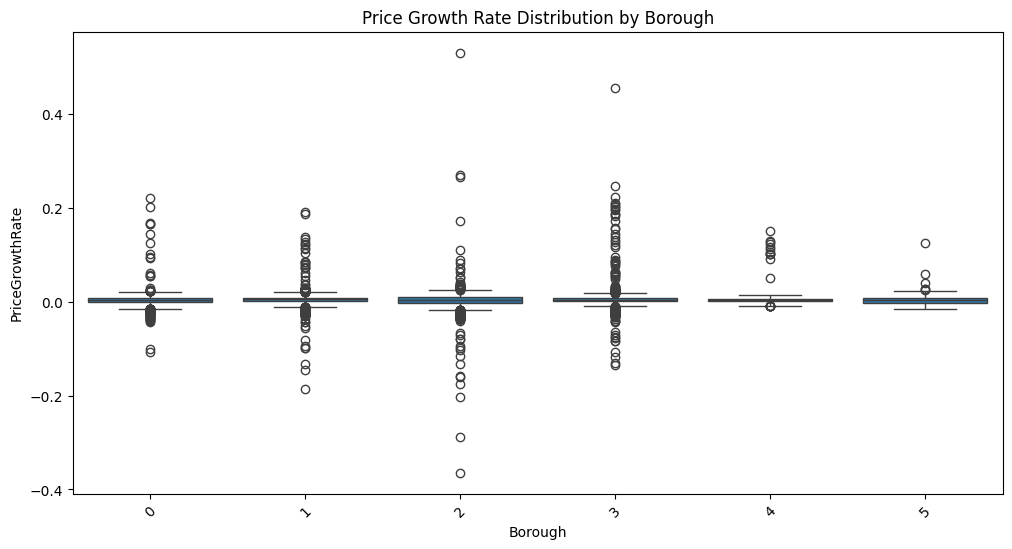

In [87]:
df['PriceGrowthRate'] = df.groupby('zipcode')['AveragePrice'].pct_change()
plt.figure(figsize=(12,6))
sns.boxplot(x='Borough', y='PriceGrowthRate', data=df)
plt.title('Price Growth Rate Distribution by Borough')
plt.xticks(rotation=45)
plt.show()

# Relationship between price and other factors

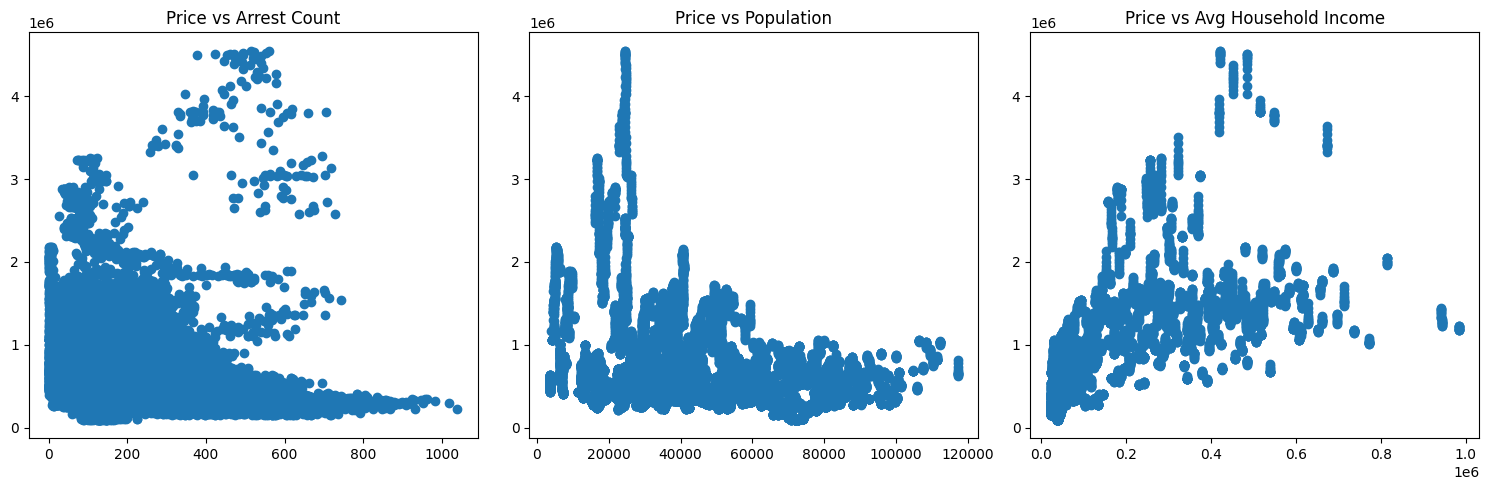

In [88]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.scatter(df['ArrestCount'], df['AveragePrice'])
plt.title('Price vs Arrest Count')
plt.subplot(132)
plt.scatter(df['population'], df['AveragePrice'])
plt.title('Price vs Population')
plt.subplot(133)
plt.scatter(df['average_household_income'], df['AveragePrice'])
plt.title('Price vs Avg Household Income')
plt.tight_layout()
plt.show()

# 2. Feature Importance Analysis

In [89]:
X = df[numerical_columns].drop('AveragePrice', axis=1)
y = df['AveragePrice']

In [90]:
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    X[col] = df[col]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [93]:
#  feature importances
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

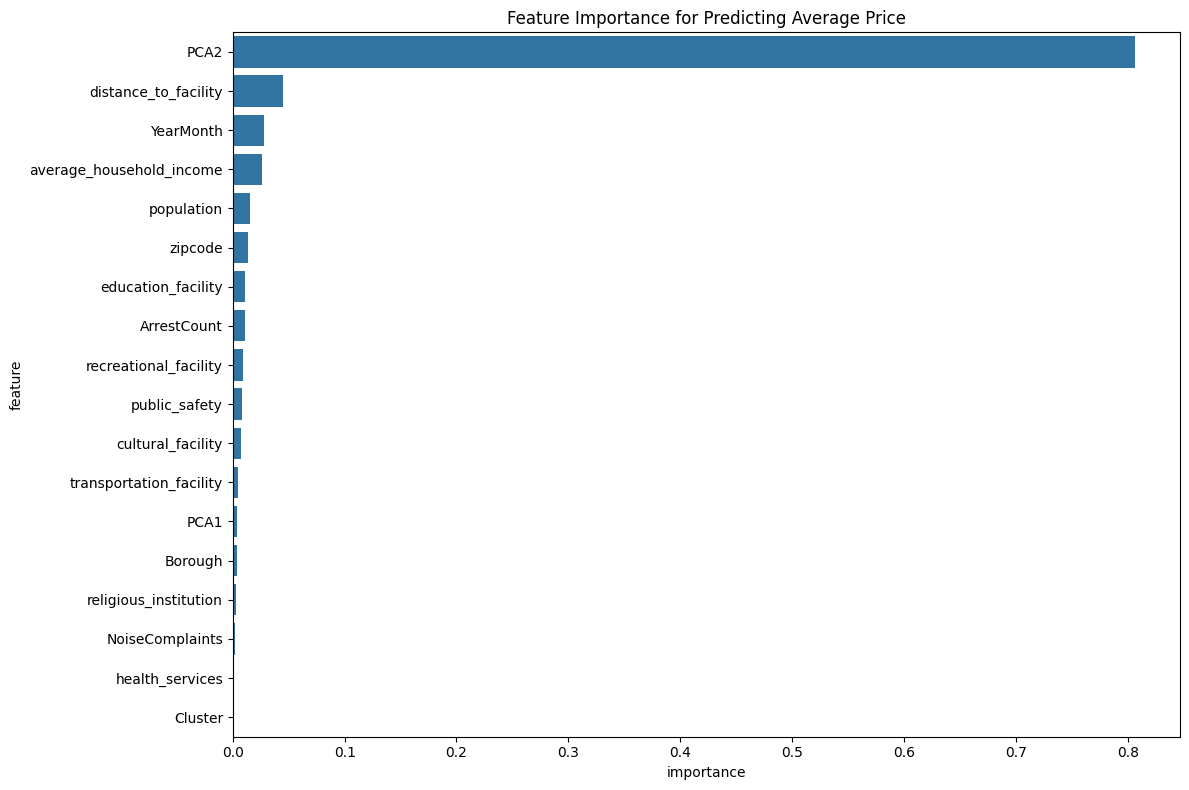

In [94]:
#  feature importances
plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Predicting Average Price')
plt.tight_layout()
plt.show()

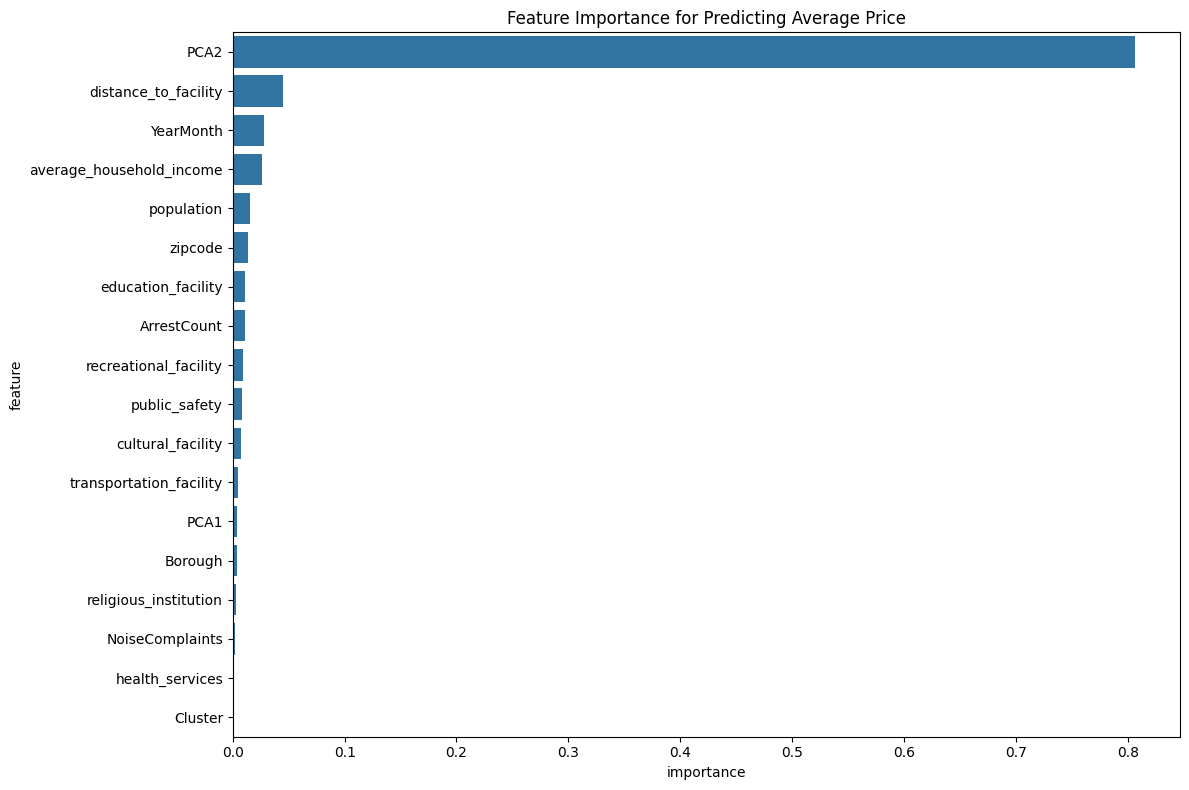

In [95]:
# feature importances
plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Predicting Average Price')
plt.tight_layout()
plt.show()